### fbprophet_Korea, South confirmed cases demo

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from math import floor
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
CONFIRMED_PATH = r"C:\Users\offco\Documents\Dev_Projects\JHUCovidDatasetAnP\modified\confirmed"
data = pd.read_csv(CONFIRMED_PATH + "/confirmed_korea, south.csv")

In [3]:
data.head()

,Date,"Korea, South"
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


In [4]:
data.rename(columns={'Date': 'ds', 'Korea, South': 'y'}, inplace=True)
data['ds'] = data['ds'].apply(lambda x: pd.to_datetime(x))
data.head()

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


### Recent 2.5% Prediction

In [5]:
def train_test_split(df, test_size):
    
    test_size = floor(len(df)*test_size)
    train_data = df[:-test_size]
    test_data = df[-test_size:]
    
    return [train_data, test_data]

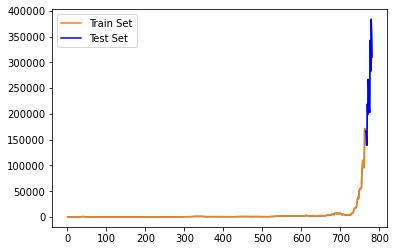

In [6]:
train_data, test_data = train_test_split(data, 0.025)

plt.plot(data['y'].diff())
plt.plot(train_data['y'].diff(), label='Train Set')
plt.plot(test_data['y'].diff(), label='Test Set', color='Blue')
plt.legend()

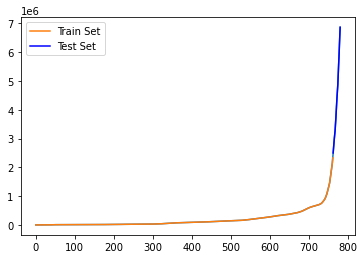

In [12]:
plt.plot(data['y'])
plt.plot(train_data['y'], label='Train Set')
plt.plot(test_data['y'], label='Test Set', color='Blue')
plt.legend()

In [7]:
m1 = Prophet(changepoint_range=1.0)
m1.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
preds = m1.predict(test_data)

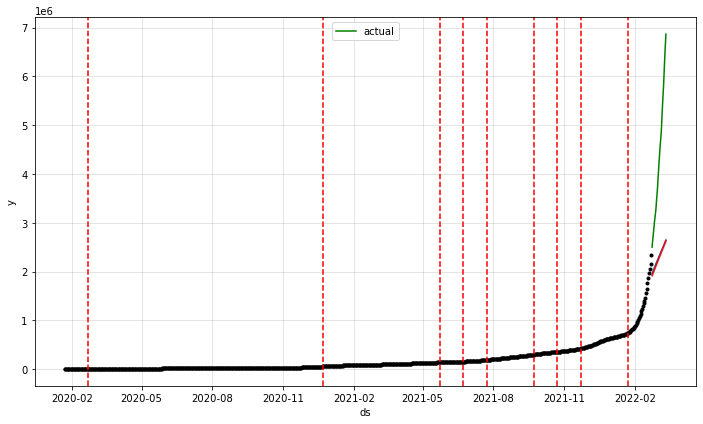

In [9]:
fig1 = m1.plot(preds)
plt.plot(test_data['ds'], test_data['y'], 'g-', label='actual')
a = add_changepoints_to_plot(fig1.gca(), m1, preds)
plt.legend()

### Upcoming 30-Days Prediction

In [10]:
m2 = Prophet(changepoint_range=1.0)
m2.fit(data)
fut_30 = m2.make_future_dataframe(periods=30)
fut_preds = m2.predict(fut_30)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


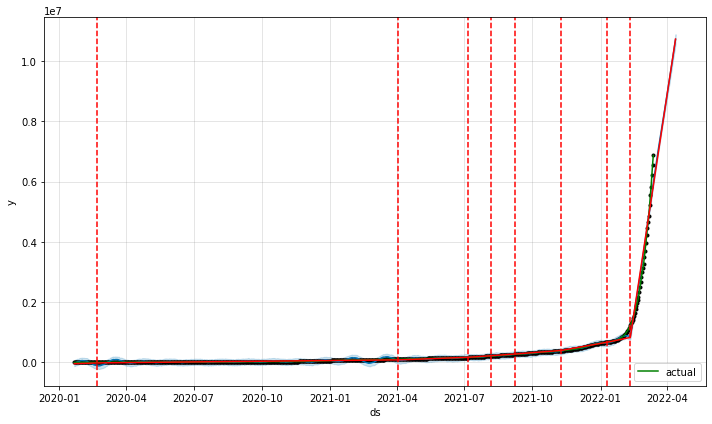

In [11]:
fig2 = m2.plot(fut_preds)
plt.plot(data['ds'], data['y'], 'g-', label='actual')
a = add_changepoints_to_plot(fig2.gca(), m2, fut_preds)
plt.legend()